# Zomato Restaurants Rating

![Project Image](zomato_image.png)
*Image source: [Kaggle](https://www.kaggle.com/datasets/abhijitdahatonde/zomato-restaurants-dataset)*

## Outline

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#loading">Data Loading</a></li>
<li><a href="#preprocessing">Preprocessing</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#engineering">Feature Engineering</a></li>
<li><a href="#building">Model Building</a></li>
<li><a href="#evaluation">Model Performance Evaluation</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is centered around developing a machine learning model to predict whether a restaurant receives a good rating (1) or a bad rating (0) based on comprehensive data sourced from Zomato. This initiative combines data analysis with predictive modeling techniques to uncover valuable insights into customer preferences and dining trends across various neighborhoods.

With a rich dataset encompassing attributes such as restaurant types, cuisines, approximate costs, and user reviews, the project aims to explore the factors that significantly influence restaurant ratings. By leveraging advanced statistical methods and machine learning algorithms, the model seeks to accurately classify restaurants and provide actionable recommendations for enhancing customer satisfaction and operational performance.

In today's competitive restaurant industry, understanding what drives positive customer experiences is critical for business success. Through rigorous analysis of Zomato's extensive data, this project endeavors to empower restaurant owners and stakeholders with actionable insights. By predicting rating outcomes, the model aims to assist in strategic decision-making, from optimizing menu offerings to improving service quality, ultimately fostering a better dining experience for customers.

Through the integration of data science methodologies and real-world application in the food service sector, the Zomato project not only aims to predict restaurant ratings but also to contribute to broader discussions on consumer behavior and industry trends. This initiative represents a pivotal step towards harnessing data-driven approaches to inform and innovate within the vibrant landscape of the restaurant industry.


### Dataset Description

- **url** : The website of the restaurant
- **address**: Address of the restaurant
- **name**: Name of the restaurant
- **online_order**: Indicates whether the restaurant accepts orders online
- **book_table**: Indicates whether the restaurant offers table reservations
- **rate**: The restaurant’s rating out of 5 based on user reviews
- **votes**: User votes received by the restaurant
- **phone**: Contact number of the restaurant
- **location**: City or district where the restaurant is situated
- **rest_type**: Category or style that describes the restaurant (e.g., quick bites, casual dining, cafe)
- **dish_liked**: Dishes liked by customers
- **cuisines**: Types of cuisine offered at the restaurant
- **approx_cost(for two people)**: Approximate cost of food for two people dining at the restaurant
- **reviews_list**: User reviews and ratings for the restaurant
- **menu_item**: List of dishes offered on the restaurant’s menu
- **listed_in(type)**: Type of service or dining experience provided by the restaurant (e.g., buffet, delivery)
- **listed_in(city)**: City under which which the restaurant is listed in

<a id='loading'></a>
## Data Loading

In [1]:
# import libraries

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from sklearn.model_selection import StratifiedKFold, cross_validate
from wordcloud import WordCloud

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# create SQL connection to SQLite database

conn = sqlite3.connect('zomato_rawdata.sqlite')

In [3]:
# read data from table

df = pd.read_sql_query("SELECT * FROM Users" , conn)

<a id='preprocessing'></a>
## Preprocessing

In [4]:
# view data head

df.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
# drop index column

df.drop('index', axis = 1, inplace = True)

In [6]:
# view the info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
# view the statistics of the dataset

df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


> The initial statistics returns votes as the only numerical feature for now. The feature has a mean value of 283.7, a high standard deviation of 803.84 indicating substantial variability, and values ranging from 0 to 16,832. The median is 41, suggesting a right-skewed distribution with most data points below 198.

In [8]:
# view list of features with missing values

feature_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [9]:
# view null counts of all columns

df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
# print percentage of missing values 

for feature in feature_na:
    print('{} has {} % missing values'.format(feature, np.round(df[feature].isnull().sum()/len(df)*100, 2)))  

rate has 15.03 % missing values
phone has 2.34 % missing values
location has 0.04 % missing values
rest_type has 0.44 % missing values
dish_liked has 54.29 % missing values
cuisines has 0.09 % missing values
approx_cost(for two people) has 0.67 % missing values


> Most of the features with missing values have less than 1% missing data, except the rate and dish_liked features, being the only features with considerable amounts of missing data

### Based on initial observations, the rate values are in fractions, which is why it has an object datatype. Also, the approx_cost(for two people) seems to be a numerical column but it currently has an object datatype. The two columns should be investigated further and adjusted to numerical datatype instead of object

### rate datatype investigation

In [11]:
# view unique values

df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
# remove denominators of the fractions

df['rate'] = df['rate'].astype('str').apply(lambda x: x.split('/')[0])

In [13]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'None', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [14]:
# replace non numeric values with nan

df['rate'].replace('NEW' , np.nan , inplace=True)
df['rate'].replace('None' , np.nan , inplace=True)
df['rate'].replace('-' , np.nan , inplace=True)

In [15]:
# change datatype to float

df['rate'] = df['rate'].astype(float)

In [16]:
# check new null count

df['rate'].isnull().sum()

10052

### approx_cost(for two people) datatype investigation

In [17]:
# view unique values

df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [18]:
# remove commas

df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',' , '')   ## replace comma 

In [19]:
# confirm removal of commas

df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', None, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [20]:
# change datatype to float

df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

<a id='eda'></a>
## Exploratory Data Analysis

In [21]:
# start by viewing the number of unique values for each categorical feature

cat_features = [col for col in df.columns if df[col].dtype=='O']

for feature in cat_features:
    print('{} has total {} unique values'.format(feature , df[feature].nunique()))

url has total 51717 unique values
address has total 11495 unique values
name has total 8792 unique values
online_order has total 2 unique values
book_table has total 2 unique values
phone has total 14926 unique values
location has total 93 unique values
rest_type has total 93 unique values
dish_liked has total 5271 unique values
cuisines has total 2723 unique values
reviews_list has total 22513 unique values
menu_item has total 9098 unique values
listed_in(type) has total 7 unique values
listed_in(city) has total 30 unique values


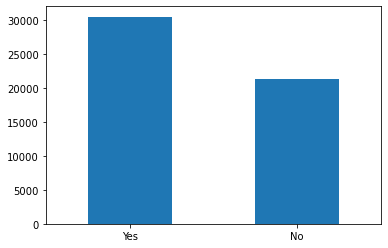

In [22]:
# view distribution of online_order

plt.figure()
df['online_order'].value_counts().plot.bar(rot = 0);

> The above plot shows that more restaurants in the dataset have the option to order online

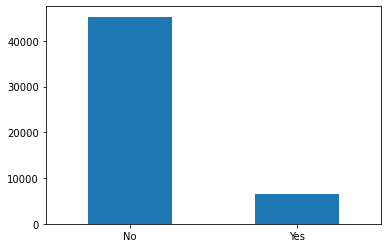

In [23]:
# view distribution of book_table

plt.figure()
df['book_table'].value_counts().plot.bar(rot = 0);

> Most restaurants do not have table booking option

In [24]:
# view count distribution of location

df['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

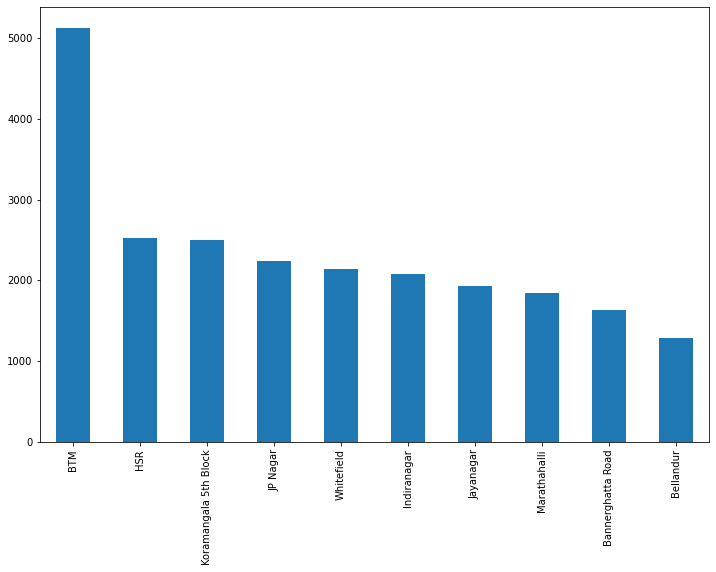

In [25]:
# view distribution of top 10 locations

plt.figure(figsize = (12,8))
df['location'].value_counts().nlargest(10).plot.bar();

In [26]:
# view percentage distribution of top 10 locations

(df['location'].value_counts()/len(df)*100)[0:10]

BTM                      9.907767
HSR                      4.878473
Koramangala 5th Block    4.841735
JP Nagar                 4.321596
Whitefield               4.145639
Indiranagar              4.027689
Jayanagar                3.724114
Marathahalli             3.569426
Bannerghatta Road        3.151768
Bellandur                2.486610
Name: location, dtype: float64

> The most patronized restaurants are those located in BTM, compared to other locations

In [27]:
# view count distribution of restaurant types

df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

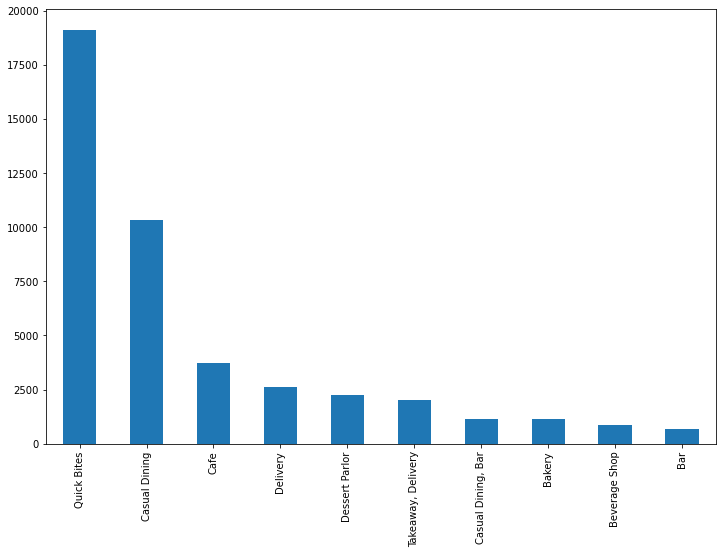

In [28]:
# view distribution of top 10 restaurant types

plt.figure(figsize = (12, 8))
df['rest_type'].value_counts().nlargest(10).plot.bar();

> The plot above shows that most of the restaurants are Quick Bites or Casual Dining restaurants, compared to the many other restaurant types with small distributions

In [29]:
# view percentage distribution of top 10 restaurant types

(df['rest_type'].value_counts()/len(df)*100)[0:10]

Quick Bites           36.993638
Casual Dining         19.974090
Cafe                   7.216196
Delivery               5.035095
Dessert Parlor         4.375737
Takeaway, Delivery     3.938744
Casual Dining, Bar     2.231375
Bakery                 2.206238
Beverage Shop          1.676431
Bar                    1.347719
Name: rest_type, dtype: float64

### Since many restaurants have multiple types, a new feature can be developed that returns the count of restaurant types

In [30]:
# define function to count number of restaurant types

def count(row):
    return len(row.split(','))

In [31]:
# create feature for count of restaurant types

df['total_rest_types'] = df['rest_type'].astype(str).apply(count)

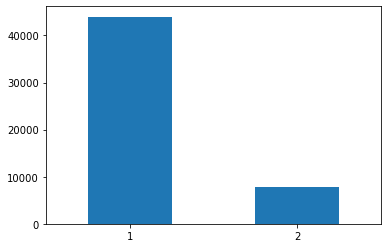

In [32]:
# plot distributions of total_rest_types

df['total_rest_types'].value_counts().plot.bar(rot = 0);

> The plot above shows that most restaurants prefer to be of one type. Since the dataset only consists of either 1 or 2 total restaurant types, the feature will be treated as a categorical feature and not a numerical feature

### Due to the significant distribution of the top types, the restaurant types can be further categorized by creating a new category for all types not in the top 5 types

In [33]:
# extract top 5 restaurant types

top_5_types = df['rest_type'].value_counts()[0:5]

top_5_types

Quick Bites       19132
Casual Dining     10330
Cafe               3732
Delivery           2604
Dessert Parlor     2263
Name: rest_type, dtype: int64

In [34]:
# replace restaurant types not in top 5 with 'Others'

df['rest_type'] = df['rest_type'].apply(lambda x : 'Others' if x not in top_5_types.index else x)

In [35]:
df['rest_type'].value_counts()

Quick Bites       19132
Others            13656
Casual Dining     10330
Cafe               3732
Delivery           2604
Dessert Parlor     2263
Name: rest_type, dtype: int64

In [36]:
# view dish_liked column

df['dish_liked']

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51712                                                 None
51713                                                 None
51714                                                 None
51715                         Cocktails, Pizza, Buttermilk
51716                                                 None
Name: dish_liked, Length: 51717, dtype: object

In [37]:
# concatenate all dishes into one string

dishes = df['dish_liked'].str.lower().str.cat(sep = ', ')

dishes

'pasta, lunch buffet, masala papad, paneer lajawab, tomato shorba, dum biryani, sweet corn soup, momos, lunch buffet, chocolate nirvana, thai green curry, paneer tikka, dum biryani, chicken biryani, churros, cannelloni, minestrone soup, hot chocolate, pink sauce pasta, salsa, veg supreme pizza, masala dosa, panipuri, gol gappe, onion rings, pasta, kadhai paneer, salads, salad, roti, jeera rice, farmhouse pizza, chocolate banana, virgin mojito, pasta, paneer tikka, lime soda, prawn pizza, pizza, mocktails, coffee, nachos, salad, pasta, sandwiches, waffles, pasta, coleslaw sandwich, choco waffle, tacos, momos, cheese nachos, waffles, pasta, crispy chicken, honey chilli chicken, sandwich, coffee, crepe, mocktails, peri fries, lasagne, pizza, chicken bbq wings, virgin mojito, nachos, coffee, spaghetti, pancakes, nachos, pasta, sandwich, garlic bread, sandwich, omelette, ice tea, virgin mojito, hot chocolate, pasta arrabiata, hazelnut cappuccino, churros, cannelloni, minestrone soup, hot ch

In [38]:
# !pip install wordcloud

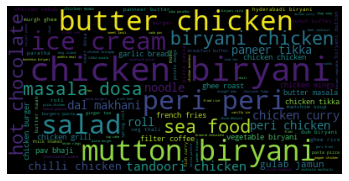

In [39]:
# create wordcloud of dishes to see the distribution

wordcloud = WordCloud().generate(dishes)

plt.imshow(wordcloud)
plt.axis('off');

> The wordcloud above shows that the most liked dishes are Chicken Biryani, Mutton Biryani, Butter Chicken, Peri Peri, Ice Cream, etc.

In [40]:
# view count distribution of cuisines

df['cuisines'].value_counts()

North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: cuisines, Length: 2723, dtype: int64

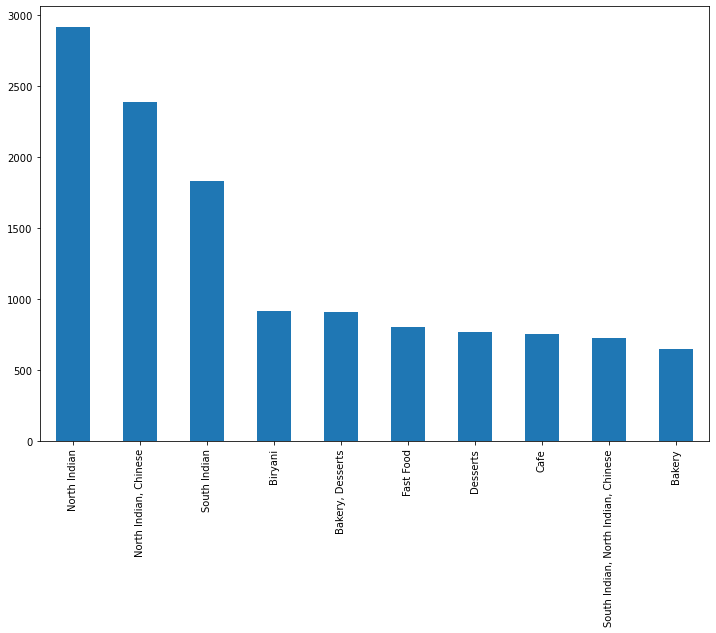

In [41]:
# plot distribution of top 10 cuisines

plt.figure(figsize = (12, 8))
df['cuisines'].value_counts().nlargest(10).plot.bar();

> The plot above shows that North Indian, Chinese and South Indian are the most popular cuisines

In [42]:
# view percentage distribution of top 10 cuisines

(df['cuisines'].value_counts()/len(df)*100)[0:10]

North Indian                           5.632577
North Indian, Chinese                  4.611636
South Indian                           3.534621
Biryani                                1.775045
Bakery, Desserts                       1.761510
Fast Food                              1.552681
Desserts                               1.481138
Cafe                                   1.461802
South Indian, North Indian, Chinese    1.403794
Bakery                                 1.258774
Name: cuisines, dtype: float64

### Since many restaurants have multiple cuisines, a new feature can also be developed that returns the count of cuisines

In [43]:
# create feature for count of total_cuisines

df['total_cuisines'] = df['cuisines'].astype(str).apply(count)

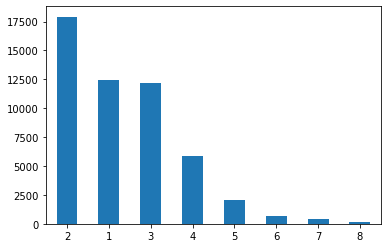

In [44]:
# plot distribution of total_cuisines

df['total_cuisines'].value_counts().plot.bar(rot = 0);

> The distribution above shows that most restaurants do not offer a wide variety of cuisines, with the majority having only 1 to 3 cuisines

In [45]:
# view count distribution of menu items

df['menu_item'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

> Most of the menu items are empty lists. The column will be dropped later on since the information is not useful

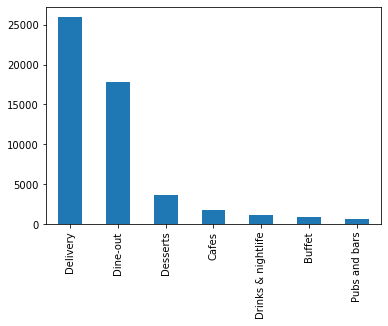

In [46]:
# view distribution of listed_in(type)

plt.figure()
df['listed_in(type)'].value_counts().plot.bar();

> Delivery and Dine-out have the highest distributions of listed_in(type), compared to the other options

In [47]:
# view count distribution of listed_in(city)

df['listed_in(city)'].value_counts()

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: listed_in(city), dtype: int64

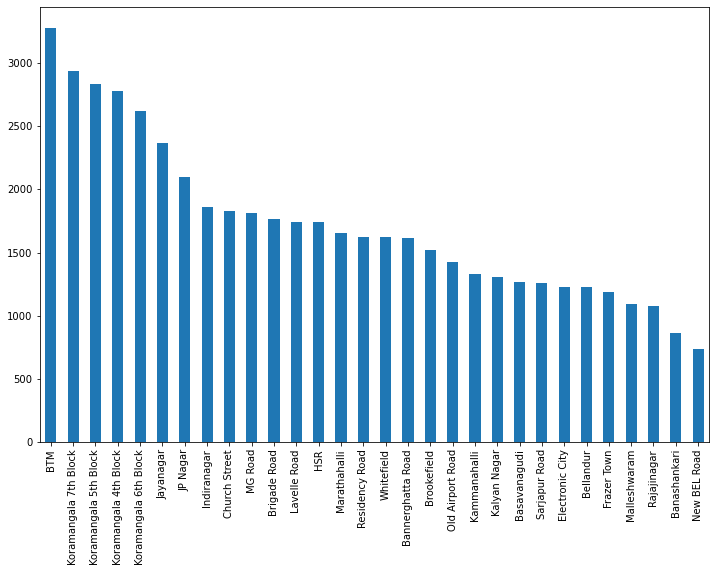

In [48]:
# view distribution of listed_in(city)

plt.figure(figsize = (12,8))
df['listed_in(city)'].value_counts().plot.bar();

In [49]:
# view percentage distribution of top 10 listed_in(city)

(df['listed_in(city)'].value_counts()/len(df)*100)[0:10]

BTM                      6.340275
Koramangala 7th Block    5.680917
Koramangala 5th Block    5.483690
Koramangala 4th Block    5.373475
Koramangala 6th Block    5.071833
Jayanagar                4.584566
JP Nagar                 4.052826
Indiranagar              3.596496
Church Street            3.532688
MG Road                  3.501750
Name: listed_in(city), dtype: float64

> The plot above shows that BTM and Koramangala Blocks have the highest distributions of listed_in(city), with the  other cities not being too far behind

### View distribution plots of the continuous features in the dataset (approx_cost(for two people) and votes)

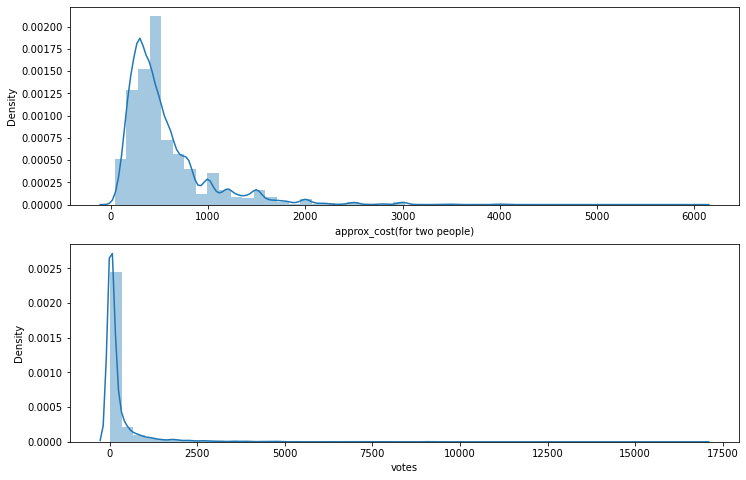

In [50]:
# distribution plots

plt.figure(figsize=(12,8))

plt.subplot(211)
sns.distplot(df['approx_cost(for two people)'])

plt.subplot(212)
sns.distplot(df['votes']);

> The plots above show that the distributions of the approx_cost(for two people) and votes features are right skewed. Log transformations can be applied to adjust the distributions

In [51]:
# apply log transformation to the features 

df['approx_cost(for two people)'] = np.log1p(df['approx_cost(for two people)'])

df['votes'] = np.log1p(df['votes'])

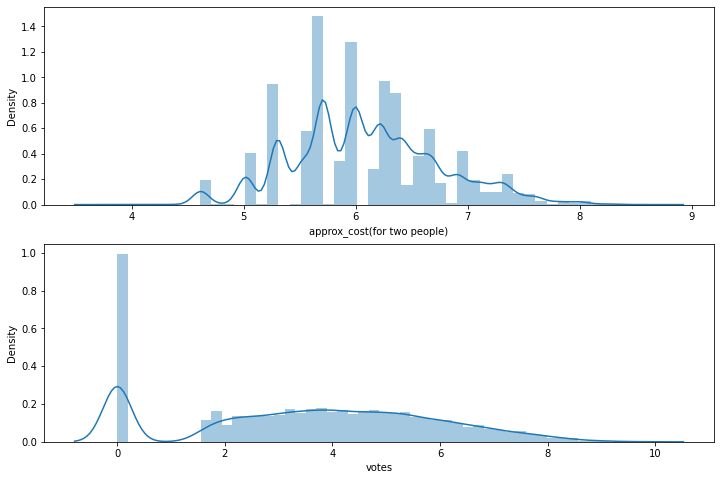

In [52]:
# view new distributions

plt.figure(figsize=(12,8))

plt.subplot(211)
sns.distplot(df['approx_cost(for two people)'])

plt.subplot(212)
sns.distplot(df['votes']);

> The plots above show that after applying log transformations to the features, the new distributions now lean toward normal distributions

### Rate Exploration 

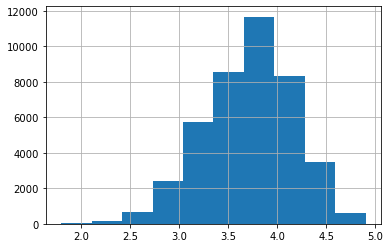

In [53]:
# plot histogram of rate feature

df['rate'].hist();

> The plot above shows that most restaurants got ratings between 3.5 and 4

In [54]:
# view count of missing rates

df['rate'].isnull().sum()

10052

### Some rates can be extracted from reviews_list column and used to populate missing fields in the rate column

In [55]:
# view reviews_list column

df['reviews_list']

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
3        [('Rated 4.0', "RATED\n  Great food and proper...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
                               ...                        
51712    [('Rated 5.0', "RATED\n  Food and service are ...
51713                                                   []
51714                                                   []
51715    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
51716    [('Rated 5.0', 'RATED\n  Great ambience , look...
Name: reviews_list, Length: 51717, dtype: object

In [56]:
# define function to extract rates from reviews_list as much as possible

def extract_rate(x):
    reviews = ast.literal_eval(x)
    
    if reviews is None or len(reviews) < 1:
        return None
    else:
        # extract first input only
        review = reviews[0]
        rate = float([i.replace('Rated', '').strip() for i in review][0])
        return rate

In [57]:
# apply extract_rate function

df['reviews_list_rate'] = df['reviews_list'].apply(extract_rate)
df['reviews_list_rate']

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51712    5.0
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: reviews_list_rate, Length: 51717, dtype: float64

In [58]:
# confirm floats less than or equal to 5 and nans were the only extracted values

df['reviews_list_rate'].unique()

array([4. , 3. , 5. , 1. , 2. , 1.5, nan, 3.5, 4.5, 2.5])

In [59]:
# fill missing rate values with values extracted from reviews_list

df['rate'].fillna(df['reviews_list_rate'], inplace=True)

In [60]:
# view new null count of rate

df['rate'].isnull().sum()

6474

### Create label using rate feature

In [61]:
# define a threshold to split restaurants into good and bad and create label feature based on threshold

threshold = 3.8

df['label'] = df['rate'].apply(lambda x: 1 if x >= threshold else 0)

In [62]:
# view updated dataframe

df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_rest_types,total_cuisines,reviews_list_rate,label
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,6.654153,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,"North Indian, Mughlai, Chinese",6.685861,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,1,3,4.0,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,6.669498,080 41714161,Banashankari,Casual Dining,...,"Chinese, North Indian, Thai",6.685861,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1,3,4.0,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,6.823286,+91 9663487993,Banashankari,Others,...,"Cafe, Mexican, Italian",6.685861,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,2,3,3.0,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,4.488636,+91 9620009302,Banashankari,Quick Bites,...,"South Indian, North Indian",5.707110,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,1,2,4.0,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,5.117994,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,"North Indian, Rajasthani",6.398595,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,1,2,4.0,1


In [63]:
# view updated null count of features

df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            6474
votes                              0
phone                           1208
location                          21
rest_type                          0
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
total_rest_types                   0
total_cuisines                     0
reviews_list_rate               7595
label                              0
dtype: int64

### There is no other way of filling the missing labels. Applying imputing techniques might not give a true reflection of the missing ratings. Hence, the rows with missing rates can be dropped

In [64]:
# drop rows with missing rates

df.dropna(subset=['rate'], inplace = True)

In [65]:
# view updated null count of features

df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            972
location                           0
rest_type                          0
dish_liked                     21611
cuisines                          17
approx_cost(for two people)      298
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
total_rest_types                   0
total_cuisines                     0
reviews_list_rate               1121
label                              0
dtype: int64

### Drop phone and reviews_list_rate features as they are not important. Also drop dish_liked feature since more than 50% of its data is missing

In [66]:
# drop phone dish_liked and 'reviews_list_rate' feature

df.drop(['phone', 'dish_liked', 'reviews_list_rate'], axis=1, inplace = True)

In [67]:
# view updated null count

df.isnull().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                        17
approx_cost(for two people)    298
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
total_rest_types                 0
total_cuisines                   0
label                            0
dtype: int64

### Due to low null counts of cuisines and approx_cost(for two people), rows with applicable missing values can be dropped

In [68]:
# drop rows with missing values

df.dropna(inplace = True)

In [69]:
# confirm zero null counts

df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
total_rest_types               0
total_cuisines                 0
label                          0
dtype: int64

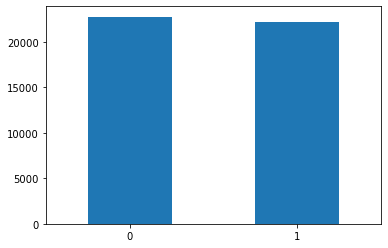

In [70]:
# view distibution of label variable

df['label'].value_counts().plot.bar(rot = 0);

> The plot above shows that there is an almost even distribution of good and bad ratings

### Explore the relationships between the dependent feature and independent features

In [71]:
# define a function to plot clustered bar charts for inputted features

def clustered_bar_chart(x):
    plt.figure(figsize=(12, 8))
    sns.countplot(data = df, x = x, hue = 'label')

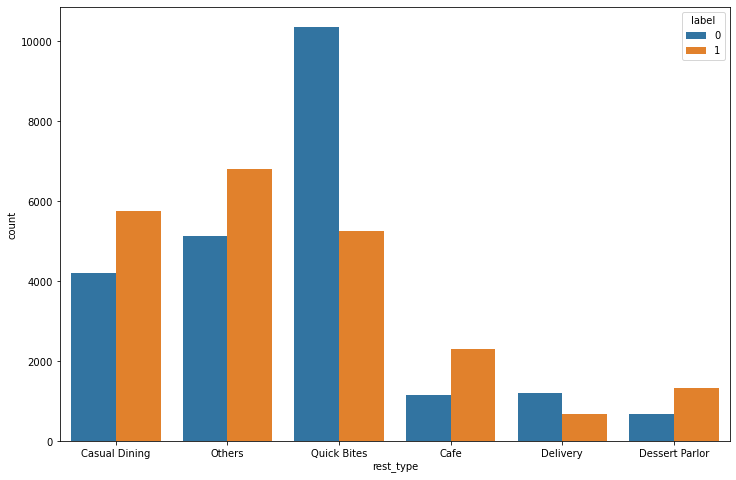

In [72]:
# plot clustered bar chart of rest_type and label

clustered_bar_chart('rest_type')

> The plot shows that Quick Bites and Delivery restaurants are the only restaurant types having more bad ratings than good ratings

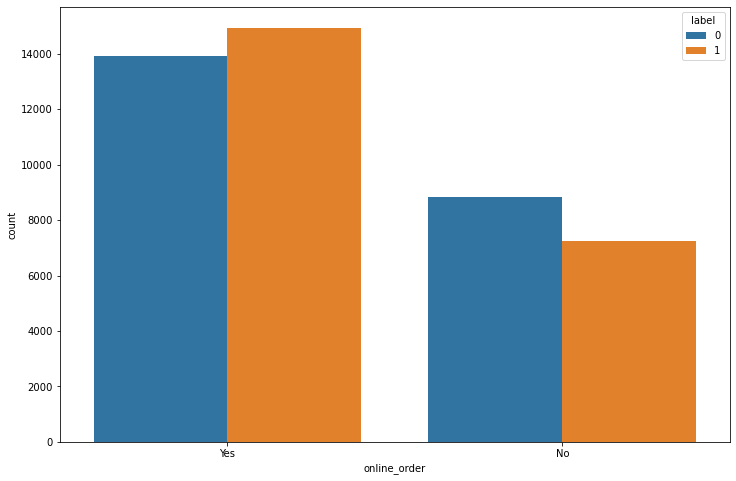

In [73]:
# plot clustered bar chart of online_order and label

clustered_bar_chart('online_order')

> The above shows that restaurants with the option to order online generally have more good ratings than bad ratings while it is vice versa for restaurants without the option to order online

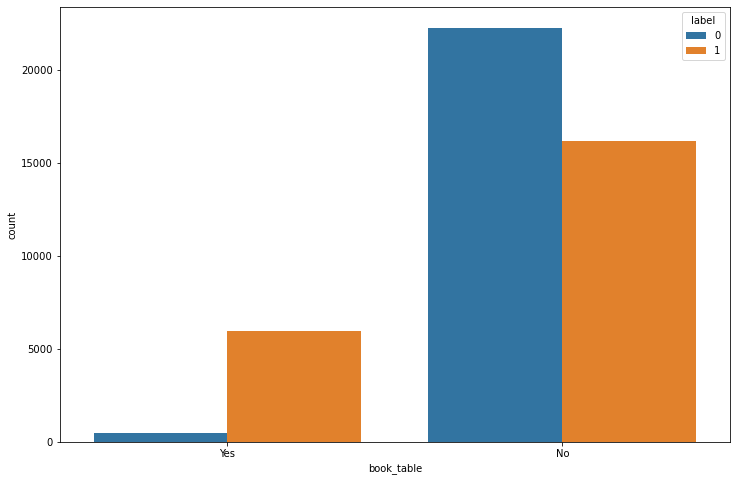

In [74]:
# plot clustered bar chart of book_table and label

clustered_bar_chart('book_table')

> The plot above shows that the vast majority of restaurants with table booking have good ratings, while most restaurants without table booking have more bad ratings than good. Restaurants with table bookings typically offer this feature due to high customer volume, popularity, and sophistication. This suggests that the more popular or sophisticated a restaurant is, the more likely it is to have a good rating.

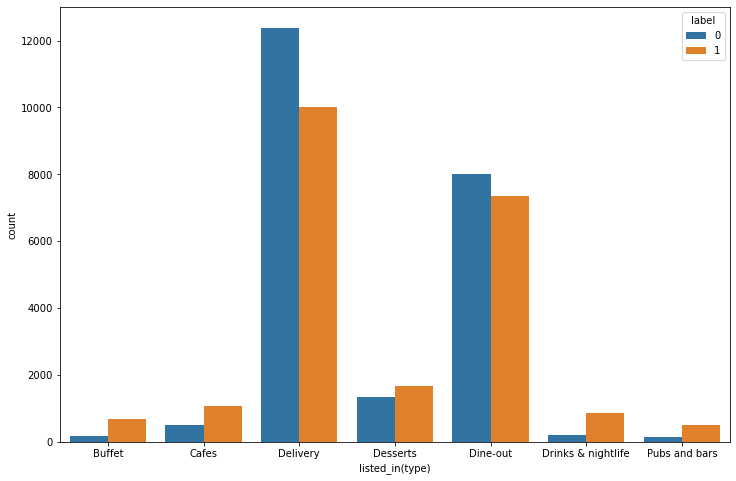

In [75]:
# plot clustered bar chart of listed_in(type) and label

clustered_bar_chart('listed_in(type)')

> The above plot shows that the majority listed_in(type) categories (Delivery and Dine-out) are the only categories that have more bad ratings than good ratings. All other categories have more good ratings than bad.

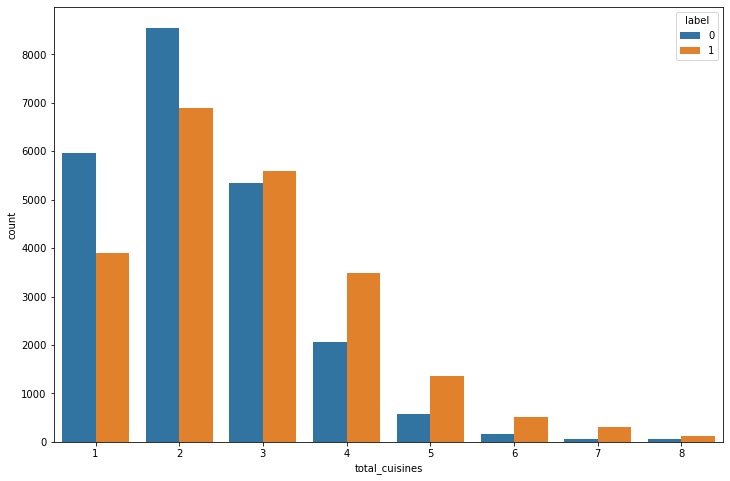

In [76]:
# plot clustered bar chart of total_cuisines and label

clustered_bar_chart('total_cuisines')

> Only restaurants with 2 or less cuisines had more bad ratings than good ratings, with higher variety restaurants having more good ratings than bad. There is a chance that restaurants should always consider adding to their variety of cuisines.

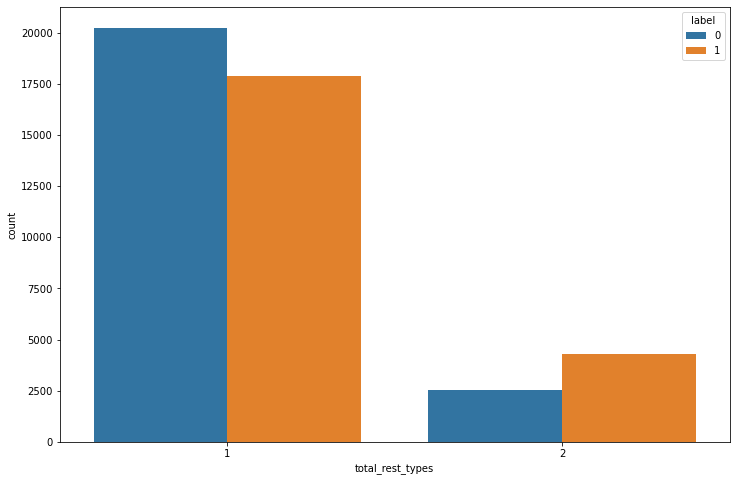

In [77]:
# plot clustered bar chart of total_rest_types and label

clustered_bar_chart('total_rest_types')

> Restaurants with 1 restaurant type had more bad ratings than good ratings, while those with 2 restaurant types had  more good ratings than bad. Since the retaurants with 1 type are way more than those with 2 types, there is a chance that analyzing more data with 2 restaurant types could change its distribution and have the same signs those with 1 restaurant type have. However, the available data does suggest having 2 restaurant types instead of 1 could be more beneficial to restaurants

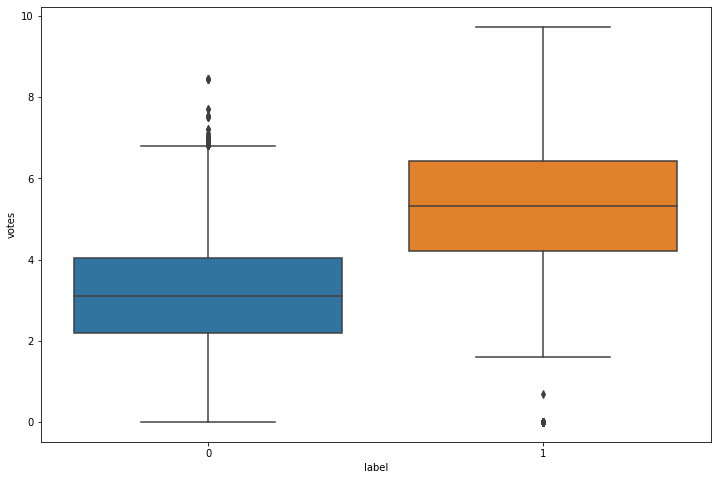

In [78]:
# plot a box plot of log transformed votes against label

plt.figure(figsize=(12, 8))

sns.boxplot(data = df, x = 'label', y = 'votes');

> The boxplot suggests a noticeable association between higher log-transformed votes and restaurants labeled as Good. This could imply that higher-rated restaurants tend to receive more votes on Zomato, reflecting greater popularity or customer satisfaction. However, the presence of outliers and an overlap in the distributions indicates that other factors besides votes also influence restaurant ratings.

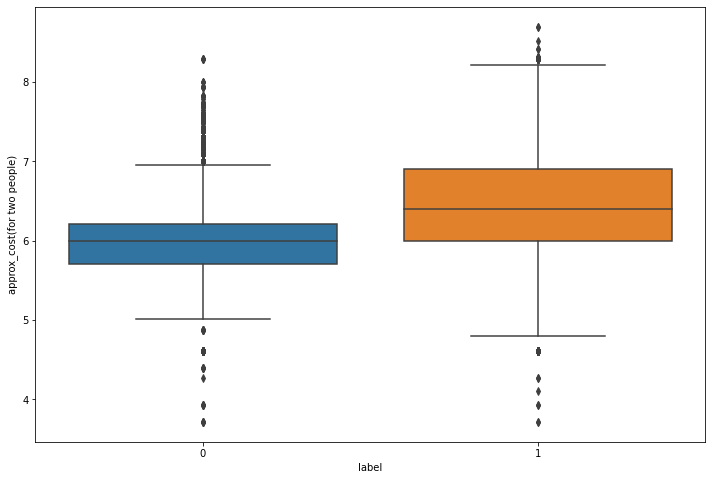

In [79]:
# plot a box plot of log transformed approx_cost(for two people) against label

plt.figure(figsize=(12, 8))

sns.boxplot(data = df, x = 'label', y = 'approx_cost(for two people)');

> The boxplot suggests that there might be a slight association between higher log-transformed approximate costs (for two people) and better ratings (Good). However, similar to the votes feature, the overlap in the distributions and the presence of outliers indicate that other factors besides cost also influence restaurant ratings.

<a id='engineering'></a>
## Feature Engineering

### Feature Importance

### Explore the correlations between the numerical features

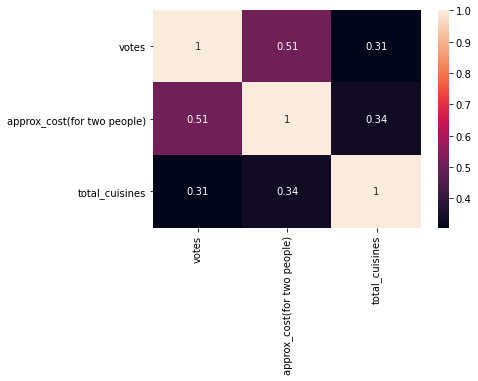

In [80]:
# plot heatmap to view correlation between numerical features

features = ['votes', 'approx_cost(for two people)', 'total_cuisines']

sns.heatmap(df[features].corr(), annot=True);

> The heatmap shows medium to low correlations between the features

### Explore the distributions between numerical features and label, comparing distribution plots of the features for each category of the label variable

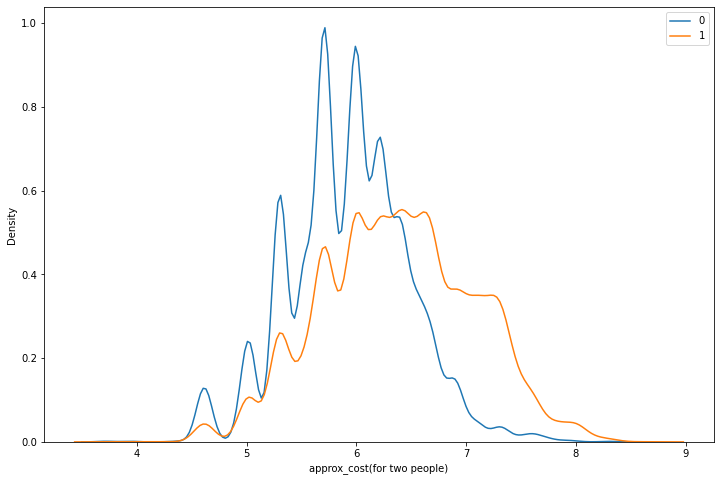

In [81]:
# create distribution plot of approx_cost(for two people) per label

plt.figure(figsize=(12, 8))
sns.distplot(df[df['label']==0]['approx_cost(for two people)'] , hist=False , label='0')
sns.distplot(df[df['label']==1]['approx_cost(for two people)'] , hist=False , label='1')
plt.legend();

> The partial overlapping in the plot above indicates that the approx_cost(for two people) feature is a good predicting variable in the dataset

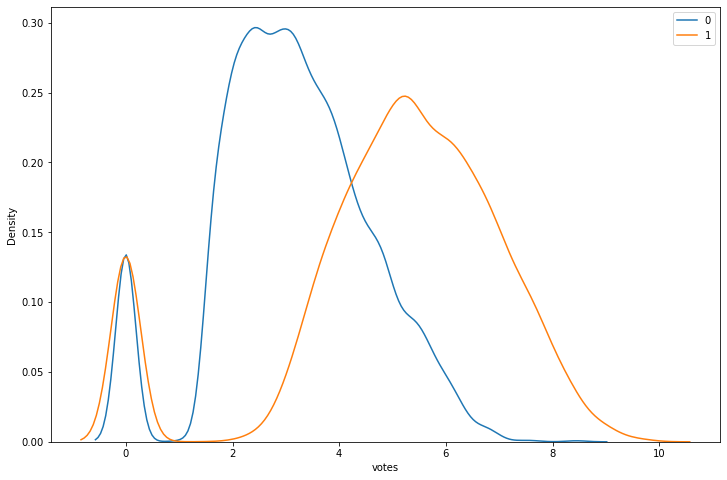

In [82]:
# create distribution plot of votes per label

plt.figure(figsize=(12, 8))
sns.distplot(df[df['label']==0]['votes'] , hist=False , label='0')
sns.distplot(df[df['label']==1]['votes'] , hist=False , label='1')
plt.legend();

> The partial overlapping in the plot above indicates that the votes feature is a good predicting variable in the dataset

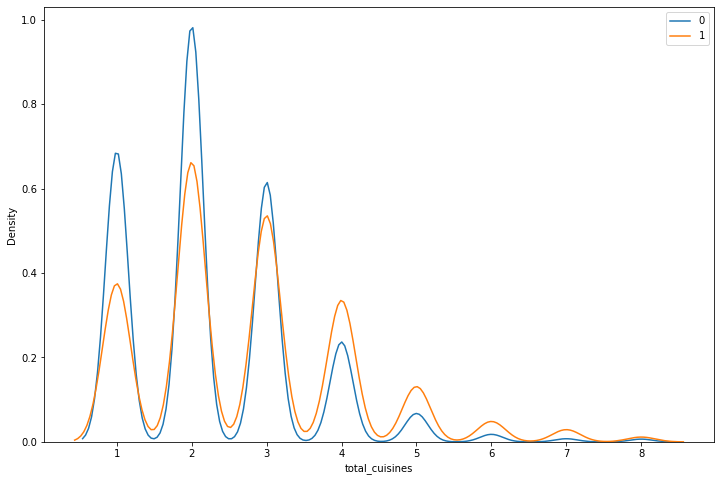

In [83]:
# create distribution plot of total_cuisines per label

plt.figure(figsize=(12, 8))
sns.distplot(df[df['label']==0]['total_cuisines'] , hist=False , label='0')
sns.distplot(df[df['label']==1]['total_cuisines'] , hist=False , label='1')
plt.legend();

> The complete overlapping indicates that the total_cuisines feature is not a strong predicting variable in the dataset

### Explore the correlations between categorical features and label

In [84]:
features = ['online_order', 'book_table', 'location', 'rest_type', 'listed_in(type)', 'listed_in(city)', 
            'total_rest_types']

# Defining a function to perform the Chi-Square Test and interpret results
def perform_chi_square_test(data, features, label):
    
    for feature in features:
        
        # Create a contingency table
        contingency_table = pd.crosstab(data[feature], data[label])

        # Perform the Chi-Square Test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Interpret the result
        significant = p < 0.05  # 5% significance level
        print('{} - chi2: {}, p_value: {}, significance: {}\n'.format(feature, chi2, p, significant))

perform_chi_square_test(df, features, 'label')

online_order - chi2: 187.3306952251754, p_value: 1.216196638349946e-42, significance: True

book_table - chi2: 5583.955288211837, p_value: 0.0, significance: True

location - chi2: 4492.883122694409, p_value: 0.0, significance: True

rest_type - chi2: 2844.5600916286944, p_value: 0.0, significance: True

listed_in(type) - chi2: 1411.6324637475343, p_value: 7.336504055727574e-302, significance: True

listed_in(city) - chi2: 1000.9083193212457, p_value: 5.563168107317535e-192, significance: True

total_rest_types - chi2: 581.6427129875714, p_value: 1.6472445694761711e-128, significance: True



> The results above indicate that there is some significance between the categorical features and the label

### Drop insignificant columns

In [85]:
# view columns

df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'total_rest_types', 'total_cuisines', 'label'],
      dtype='object')

### The columns below are to be dropped as they have little to no significance in the model building

* url, address, name, rate, cuisines, reviews_list, menu_item, total_cuisines

In [86]:
# create list of model features

features = ['online_order', 'book_table', 'votes', 'location', 'rest_type', 'approx_cost(for two people)', 
            'listed_in(type)', 'listed_in(city)', 'total_rest_types', 'label']

In [87]:
# create new dataframe of model features

df = df[features]

In [88]:
# view new dataframe

df

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),total_rest_types,label
0,Yes,Yes,6.654153,Banashankari,Casual Dining,6.685861,Buffet,Banashankari,1,1
1,Yes,No,6.669498,Banashankari,Casual Dining,6.685861,Buffet,Banashankari,1,1
2,Yes,No,6.823286,Banashankari,Others,6.685861,Buffet,Banashankari,2,1
3,No,No,4.488636,Banashankari,Quick Bites,5.707110,Buffet,Banashankari,1,0
4,No,No,5.117994,Basavanagudi,Casual Dining,6.398595,Buffet,Banashankari,1,1
...,...,...,...,...,...,...,...,...,...,...
51710,No,No,0.000000,Whitefield,Others,6.803505,Pubs and bars,Whitefield,1,1
51711,No,No,4.406719,Whitefield,Others,6.685861,Pubs and bars,Whitefield,2,0
51712,No,No,3.332205,Whitefield,Others,7.313887,Pubs and bars,Whitefield,1,0
51715,No,Yes,5.468060,"ITPL Main Road, Whitefield",Others,7.824446,Pubs and bars,Whitefield,1,1


### Feature Encoding

In [89]:
# view number of unique values of categorical features that require encoding

cat_features = [col for col in df.columns if df[col].dtype=='O']

for feature in cat_features:
    print('{} has {} unique values'.format(feature , df[feature].nunique()))

online_order has 2 unique values
book_table has 2 unique values
location has 92 unique values
rest_type has 6 unique values
listed_in(type) has 7 unique values
listed_in(city) has 30 unique values


> There is no point reducing the number of unique values in location and listed_in(city) features due to the little difference in their percentage distributions 

### Apply one-hot encoding on online_order, book_table, rest_type and listed_in(type) features since they are nominal categorical features and they have few numbers of unique values

In [90]:
# create list of categorical features to be one hot encoded

onehot_columns = ['online_order', 'book_table', 'rest_type', 'listed_in(type)']

In [91]:
# create dictionary of categorical features to be one hot encoded

cols = dict(zip(onehot_columns, onehot_columns))

In [92]:
# perform one hot encoding on applicable features

df = pd.get_dummies(df, prefix=cols, columns = onehot_columns, drop_first = True)

df.head()

,votes,location,approx_cost(for two people),listed_in(city),total_rest_types,label,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Others,rest_type_Quick Bites,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,6.654153,Banashankari,6.685861,Banashankari,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,6.669498,Banashankari,6.685861,Banashankari,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,6.823286,Banashankari,6.685861,Banashankari,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0
3,4.488636,Banashankari,5.707110,Banashankari,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5.117994,Basavanagudi,6.398595,Banashankari,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


### Apply mean encoding on 'location' and 'listed_in(city)' features due to the high number of unique values

In [93]:
# apply mean encoding on location

mean_location = df.groupby(['location'])['label'].mean().to_dict()
df['location'] = df['location'].map(mean_location)
df['location']

0        0.476427
1        0.476427
2        0.476427
3        0.476427
4        0.511076
           ...   
51710    0.413988
51711    0.413988
51712    0.413988
51715    0.336957
51716    0.336957
Name: location, Length: 44932, dtype: float64

In [94]:
# apply mean encoding on listed_in(city)

mean_city = df.groupby(['listed_in(city)'])['label'].mean().to_dict()
df['listed_in(city)'] = df['listed_in(city)'].map(mean_city)
df['listed_in(city)']

0        0.475452
1        0.475452
2        0.475452
3        0.475452
4        0.475452
           ...   
51710    0.413076
51711    0.413076
51712    0.413076
51715    0.413076
51716    0.413076
Name: listed_in(city), Length: 44932, dtype: float64

In [95]:
df.head()

,votes,location,approx_cost(for two people),listed_in(city),total_rest_types,label,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Others,rest_type_Quick Bites,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,6.654153,0.476427,6.685861,0.475452,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,6.669498,0.476427,6.685861,0.475452,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,6.823286,0.476427,6.685861,0.475452,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0
3,4.488636,0.476427,5.707110,0.475452,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5.117994,0.511076,6.398595,0.475452,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


<a id='building'></a>
## Model Building

In [96]:
# confirm all features now have numerical data types

df.dtypes

votes                                 float64
location                              float64
approx_cost(for two people)           float64
listed_in(city)                       float64
total_rest_types                        int64
label                                   int64
online_order_Yes                        uint8
book_table_Yes                          uint8
rest_type_Casual Dining                 uint8
rest_type_Delivery                      uint8
rest_type_Dessert Parlor                uint8
rest_type_Others                        uint8
rest_type_Quick Bites                   uint8
listed_in(type)_Cafes                   uint8
listed_in(type)_Delivery                uint8
listed_in(type)_Desserts                uint8
listed_in(type)_Dine-out                uint8
listed_in(type)_Drinks & nightlife      uint8
listed_in(type)_Pubs and bars           uint8
dtype: object

In [97]:
# split data into dependent and independent variables

X = df.drop('label' , axis=1)

y = df['label']

In [98]:
# split data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [99]:
# scale data to improve uniformity

mm = MinMaxScaler()
X_train[['votes', 'approx_cost(for two people)']] = mm.fit_transform(X_train[['votes', 'approx_cost(for two people)']])
X_test[['votes', 'approx_cost(for two people)']] = mm.transform(X_test[['votes', 'approx_cost(for two people)']])

In [100]:
# view X_train head

X_train.head()

,votes,location,approx_cost(for two people),listed_in(city),total_rest_types,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Others,rest_type_Quick Bites,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
30544,0.000000,0.346154,0.399818,0.538837,1,0,0,0,0,0,0,1,0,1,0,0,0,0
21119,0.391185,0.581860,0.521080,0.495202,1,0,1,1,0,0,0,0,0,0,0,1,0,0
37768,0.512132,0.573134,0.640817,0.563353,2,0,0,0,0,0,1,0,1,0,0,0,0,0
41549,0.770893,0.336272,0.596114,0.341069,1,1,1,1,0,0,0,0,0,0,0,1,0,0
10627,0.399936,0.346154,0.399818,0.497023,1,1,0,0,0,0,0,1,0,0,0,1,0,0


In [101]:
# view X_test head

X_test.head()

,votes,location,approx_cost(for two people),listed_in(city),total_rest_types,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Others,rest_type_Quick Bites,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
48181,0.845087,0.864372,0.693390,0.571528,2,1,1,0,0,0,1,0,0,0,0,1,0,0
1329,0.225794,0.346154,0.318832,0.378655,1,1,0,0,0,0,1,0,0,1,0,0,0,0
30015,0.752621,0.834171,0.619708,0.538837,1,1,1,0,0,0,0,0,0,1,0,0,0,0
4257,0.469048,0.339367,0.569369,0.410985,1,0,0,1,0,0,0,0,0,1,0,0,0,0
26486,0.837688,0.770677,0.693390,0.535597,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [102]:
# view train data shape

X_train.shape

(33699, 18)

In [103]:
# view test data shape

X_test.shape

(11233, 18)

<a id='evaluation'></a>
## Model Performance Evaluation

Run multiple classifcation algorithms with their default parameters, followed by cross validations to select the best parameters

### Logistic Regression

In [104]:
# define model and fit train data

l_model = LogisticRegression()
l_model.fit(X_train, y_train)

LogisticRegression()

In [105]:
# predict data, print train and test accuracies

y_train_pred_l = l_model.predict(X_train)
y_test_pred_l = l_model.predict(X_test)

print('Training-set accuracy score', accuracy_score(y_train, y_train_pred_l))
print('Testing-set accuracy score', accuracy_score(y_test, y_test_pred_l))

Training-set accuracy score 0.7690732662690287
Testing-set accuracy score 0.7749488115374343


In [106]:
# view confusion matrix

confusion_matrix(y_test, y_test_pred_l)

array([[4742,  952],
       [1576, 3963]])

### Logistic Regression Grid Search

In [107]:
# define parameters

parameters = {
    "C":np.logspace(-3,3,7), 
    "penalty":["l1","l2"], 
    "solver": ['lbfgs', 'liblinear']
}

In [108]:
# run grid search

lr = LogisticRegression()
grid_search_lr = GridSearchCV(estimator = lr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [109]:
# print best accuracy and parameters

best_accuracy = grid_search_lr.best_score_
best_parameters = grid_search_lr.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 77.48 %
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [110]:
# define best model and fit train data

lr_grid = grid_search_lr.best_estimator_
lr_grid.fit(X_train, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [111]:
# predict data, print train and test accuracies

y_train_pred_lr = lr_grid.predict(X_train)
y_test_pred_lr = lr_grid.predict(X_test)

print('Training-set accuracy score', accuracy_score(y_train, y_train_pred_lr))
print('Testing-set accuracy score', accuracy_score(y_test, y_test_pred_lr))

Training-set accuracy score 0.7747410902400664
Testing-set accuracy score 0.784741386984777


In [113]:
# view confusion matrix

confusion_matrix(y_test, y_test_pred_lr)

array([[4800,  894],
       [1524, 4015]])

In [114]:
# view train classification report

print(classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79     17075
           1       0.80      0.72      0.76     16624

    accuracy                           0.77     33699
   macro avg       0.78      0.77      0.77     33699
weighted avg       0.78      0.77      0.77     33699



In [115]:
# view test classification report

print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      5694
           1       0.82      0.72      0.77      5539

    accuracy                           0.78     11233
   macro avg       0.79      0.78      0.78     11233
weighted avg       0.79      0.78      0.78     11233



> Logistic Regression performs similarly on both the training and testing sets, indicating good generalization but moderate overall accuracy

### KNN

In [116]:
# define model and fit train data

k_model = KNeighborsClassifier()
k_model.fit(X_train, y_train)

KNeighborsClassifier()

In [117]:
# predict data, print train and test accuracies

y_train_pred_k = k_model.predict(X_train)
y_test_pred_k = k_model.predict(X_test)

print('Training-set accuracy score', accuracy_score(y_train, y_train_pred_k))
print('Testing-set accuracy score', accuracy_score(y_test, y_test_pred_k))

Training-set accuracy score 0.8971186088607971
Testing-set accuracy score 0.8402029733819995


In [118]:
# view confusion matrix

confusion_matrix(y_test, y_test_pred_k)

array([[4830,  864],
       [ 931, 4608]])

### KNN Grid Search

In [119]:
# define parameters

parameters = {
    'n_neighbors': [3, 5, 10, 15],    
    'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
    'weights': ["uniform", "distance"]
}

In [120]:
# run grid search

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator = knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [121]:
# print best accuracy and parameters

best_accuracy = grid_search_knn.best_score_
best_parameters = grid_search_knn.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 85.72 %
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}


In [122]:
# define best model and fit train data

knn_grid = grid_search_knn.best_estimator_
knn_grid.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance')

In [123]:
# predict data, print train and test accuracies

y_train_pred_knn = knn_grid.predict(X_train)
y_test_pred_knn = knn_grid.predict(X_test)

print('Training-set accuracy score', accuracy_score(y_train, y_train_pred_knn))
print('Testing-set accuracy score', accuracy_score(y_test, y_test_pred_knn))

Training-set accuracy score 0.9942728270868572
Testing-set accuracy score 0.8775037834950592


In [124]:
# view confusion matrix

confusion_matrix(y_test, y_test_pred_knn)

array([[5030,  664],
       [ 712, 4827]])

In [125]:
# view train classification report

print(classification_report(y_train, y_train_pred_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17075
           1       1.00      0.99      0.99     16624

    accuracy                           0.99     33699
   macro avg       0.99      0.99      0.99     33699
weighted avg       0.99      0.99      0.99     33699



In [126]:
# view test classification report

print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5694
           1       0.88      0.87      0.88      5539

    accuracy                           0.88     11233
   macro avg       0.88      0.88      0.88     11233
weighted avg       0.88      0.88      0.88     11233



> KNN performs extremely well on the training set but not as well on the testing set, indicating overfitting

### Linear SVC

In [127]:
# define model and fit train data

s_model = SVC(kernel = 'linear')
s_model.fit(X_train, y_train)

SVC(kernel='linear')

In [128]:
# predict data, print train and test accuracies

y_train_pred_s = s_model.predict(X_train)
y_test_pred_s = s_model.predict(X_test)

print('Training-set accuracy score', accuracy_score(y_train, y_train_pred_s))
print('Testing-set accuracy score', accuracy_score(y_test, y_test_pred_s))

Training-set accuracy score 0.7740289029348052
Testing-set accuracy score 0.7833170123742544


In [129]:
# view confusion matrix

confusion_matrix(y_test, y_test_pred_s)

array([[4865,  829],
       [1605, 3934]])

### RBF SVC

In [130]:
# define model and fit train data

rb_model = SVC(kernel = 'rbf')
rb_model.fit(X_train, y_train)

SVC()

In [131]:
# predict data, print train and test accuracies

y_train_pred_rb = rb_model.predict(X_train)
y_test_pred_rb = rb_model.predict(X_test)

print('Training-set accuracy score', accuracy_score(y_train, y_train_pred_rb))
print('Testing-set accuracy score', accuracy_score(y_test, y_test_pred_rb))

Training-set accuracy score 0.7804682631532093
Testing-set accuracy score 0.7828718953084661


In [132]:
# view confusion matrix

confusion_matrix(y_test, y_test_pred_rb)

array([[5017,  677],
       [1762, 3777]])

### SVC Grid Search

In [133]:
# define parameters

parameters = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001], 
    'kernel': ['rbf','linear','sigmoid']
            }

In [134]:
# run grid search

cls=SVC()
grid_search_cls = GridSearchCV(estimator = cls,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search_cls.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             scoring='accuracy')

In [135]:
# print best accuracy and parameters

best_accuracy = grid_search_cls.best_score_
best_parameters = grid_search_cls.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 80.27 %
Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [136]:
# define best model and fit train data

cls_model=grid_search_cls.best_estimator_
cls_model.fit(X_train, y_train)

SVC(C=100, gamma=1)

In [137]:
# predict data, print train and test accuracies

y_train_pred_cls = cls_model.predict(X_train)
y_test_pred_cls = cls_model.predict(X_test)

print('Training-set accuracy score', accuracy_score(y_train, y_train_pred_cls))
print('Testing-set accuracy score', accuracy_score(y_test, y_test_pred_cls))

Training-set accuracy score 0.815780883705748
Testing-set accuracy score 0.8148313006320662


In [138]:
# view confusion matrix

confusion_matrix(y_test, y_test_pred_cls)

array([[4700,  994],
       [1086, 4453]])

In [139]:
# view train classification report

print(classification_report(y_train, y_train_pred_cls))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     17075
           1       0.82      0.80      0.81     16624

    accuracy                           0.82     33699
   macro avg       0.82      0.82      0.82     33699
weighted avg       0.82      0.82      0.82     33699



In [140]:
# view test classification report

print(classification_report(y_test, y_test_pred_cls))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5694
           1       0.82      0.80      0.81      5539

    accuracy                           0.81     11233
   macro avg       0.81      0.81      0.81     11233
weighted avg       0.81      0.81      0.81     11233



> SVC shows consistent performance across both sets, indicating good generalization with slightly better accuracy than Logistic Regression

### Decision Tree 

In [141]:
# define model and fit train data

d_model = DecisionTreeClassifier(criterion = 'entropy')
d_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [142]:
# predict data, print train and test accuracies

y_train_pred_d = d_model.predict(X_train)
y_test_pred_d = d_model.predict(X_test)

print('Training-set accuracy score', accuracy_score(y_train, y_train_pred_d))
print('Testing-set accuracy score', accuracy_score(y_test, y_test_pred_d))

Training-set accuracy score 0.9943618505000148
Testing-set accuracy score 0.9256654500133535


In [143]:
# view confusion matrix

confusion_matrix(y_test, y_test_pred_d)

array([[5323,  371],
       [ 464, 5075]])

### Decision Tree Grid Search

In [144]:
# define parameters

parameters = {
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1, 5, 10, 20, 50],
    'criterion': ["gini", "entropy"]
}

In [145]:
# run grid search

dt=DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dt,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 20, 50],
                         'min_samples_split': [1, 2, 3]},
             scoring='accuracy')

In [146]:
# print best accuracy and parameters

best_accuracy = grid_search_dt.best_score_
best_parameters = grid_search_dt.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 90.93 %
Best Parameters: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 1}


In [147]:
# define best model and fit train data

dt_grid = grid_search_dt.best_estimator_
dt_grid.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=1)

In [148]:
# predict data, print train and test accuracies

y_train_pred_dt = dt_grid.predict(X_train)
y_test_pred_dt = dt_grid.predict(X_test)

print('Training-set accuracy score', accuracy_score(y_train, y_train_pred_dt))
print('Testing-set accuracy score', accuracy_score(y_test, y_test_pred_dt))

Training-set accuracy score 0.9943618505000148
Testing-set accuracy score 0.9217484198344165


In [149]:
# view confusion matrix

confusion_matrix(y_test, y_test_pred_dt)

array([[5308,  386],
       [ 493, 5046]])

In [150]:
# view train classification report

print(classification_report(y_train, y_train_pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17075
           1       1.00      0.99      0.99     16624

    accuracy                           0.99     33699
   macro avg       0.99      0.99      0.99     33699
weighted avg       0.99      0.99      0.99     33699



In [151]:
# view test classification report

print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      5694
           1       0.93      0.91      0.92      5539

    accuracy                           0.92     11233
   macro avg       0.92      0.92      0.92     11233
weighted avg       0.92      0.92      0.92     11233



> Decision Tree performs very well on both sets, but the high training accuracy compared to the testing accuracy indicates overfitting

### Random Forest

In [152]:
# define model and fit train data

r_model = RandomForestClassifier()
r_model.fit(X_train, y_train)

RandomForestClassifier()

In [153]:
# predict data, print train and test accuracies

y_train_pred_r = r_model.predict(X_train)
y_test_pred_r = r_model.predict(X_test)

print('Training-set accuracy score', accuracy_score(y_train, y_train_pred_r))
print('Testing-set accuracy score', accuracy_score(y_test, y_test_pred_r))

Training-set accuracy score 0.9943618505000148
Testing-set accuracy score 0.909285141992344


In [154]:
# view confusion matrix

confusion_matrix(y_test, y_test_pred_r)

array([[5254,  440],
       [ 579, 4960]])

### Random Forest Grid Search

In [155]:
# define parameters

parameters = {
    'n_estimators' : [10, 20, 50, 100, 150],    
    'min_samples_leaf': [1, 5, 10, 20, 50],
    'criterion': ["gini", "entropy"]
}

In [156]:
# run grid search

rf=RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 20, 50],
                         'n_estimators': [10, 20, 50, 100, 150]},
             scoring='accuracy')

In [157]:
# print best accuracy and parameters

best_accuracy = grid_search_rf.best_score_
best_parameters = grid_search_rf.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 89.73 %
Best Parameters: {'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 150}


In [158]:
# define best model and fit train data

rf_grid = grid_search_rf.best_estimator_
rf_grid.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [159]:
# predict data, print train and test accuracies

y_train_pred_rf = rf_grid.predict(X_train)
y_test_pred_rf = rf_grid.predict(X_test)

print('Training-set accuracy score', accuracy_score(y_train, y_train_pred_rf))
print('Testing-set accuracy score', accuracy_score(y_test, y_test_pred_rf))

Training-set accuracy score 0.9943618505000148
Testing-set accuracy score 0.9121338912133892


In [160]:
# view confusion matrix

confusion_matrix(y_test, y_test_pred_rf)

array([[5258,  436],
       [ 551, 4988]])

In [161]:
# view train classification report

print(classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17075
           1       1.00      0.99      0.99     16624

    accuracy                           0.99     33699
   macro avg       0.99      0.99      0.99     33699
weighted avg       0.99      0.99      0.99     33699



In [162]:
# view test classification report

print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      5694
           1       0.92      0.90      0.91      5539

    accuracy                           0.91     11233
   macro avg       0.91      0.91      0.91     11233
weighted avg       0.91      0.91      0.91     11233



> Random Forest performs very well on both sets. However, similar to Decision Tree, the high training accuracy compared to the testing accuracy indicates overfitting

### XGBoost

In [163]:
# define model and fit train data

xg = XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [164]:
# predict data, print train and test accuracies

y_train_pred_xg = xg.predict(X_train)
y_test_pred_xg = xg.predict(X_test)

print('Training-set accuracy score', accuracy_score(y_train, y_train_pred_xg))
print('Testing-set accuracy score', accuracy_score(y_test, y_test_pred_xg))

Training-set accuracy score 0.9110656102554971
Testing-set accuracy score 0.8843585863081991


In [165]:
# view confusion matrix

confusion_matrix(y_test, y_test_pred_xg)

array([[5170,  524],
       [ 775, 4764]])

### XGBoost Grid Search

In [166]:
# define parameters

parameters = {
    'n_estimators': range(60, 220, 40),
    'max_depth': range (2, 10, 1),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [167]:
# run grid search

xg = XGBClassifier()
grid_search_xg = GridSearchCV(estimator = xg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search_xg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='accuracy')

In [168]:
# print best accuracy and parameters

best_accuracy = grid_search_xg.best_score_
best_parameters = grid_search_xg.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 90.01 %
Best Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}


In [169]:
# define best model and fit train data

xgb_grid = grid_search_xg.best_estimator_
xgb_grid.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [170]:
# predict data, print train and test accuracies

y_train_pred_xgb = xgb_grid.predict(X_train)
y_test_pred_xgb = xgb_grid.predict(X_test)

print('Training-set accuracy score', accuracy_score(y_train, y_train_pred_xgb))
print('Testing-set accuracy score', accuracy_score(y_test, y_test_pred_xgb))

Training-set accuracy score 0.9457253924448796
Testing-set accuracy score 0.9102643995370783


In [171]:
# view confusion matrix

confusion_matrix(y_test, y_test_pred_xgb)

array([[5272,  422],
       [ 586, 4953]])

In [172]:
# view train classification report

print(classification_report(y_train, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     17075
           1       0.96      0.93      0.94     16624

    accuracy                           0.95     33699
   macro avg       0.95      0.95      0.95     33699
weighted avg       0.95      0.95      0.95     33699



In [173]:
# view test classification report

print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      5694
           1       0.92      0.89      0.91      5539

    accuracy                           0.91     11233
   macro avg       0.91      0.91      0.91     11233
weighted avg       0.91      0.91      0.91     11233



> XGBoost performs strongly on both sets with a good balance, suggesting effective learning and generalization

<a id='conclusion'></a>
## Conclusion

With a focus on the accuracy metric among the evaluated models, XGBoost achieved a strong balance between training and testing accuracy, with a training accuracy of 94.57% and a testing accuracy of 91.03%. While the Decision Tree model had a slightly higher testing accuracy at 92.17%, it showed signs of overfitting due to its near-perfect training accuracy. Therefore, XGBoost is recommended as the best performing model for this task due to its effective learning and better generalization capability.